## Imports

In [53]:
import numpy as np
import pandas as pd
import plotly.express as px
from shapely import wkt
import geopandas as gpd

## Ingest Data

In [9]:
df = pd.read_csv("../data/parking_data_2020.csv")

/var/folders/lr/597pxhmx2z78r4vysc_dvsth0000gn/T/ipykernel_34096/3730071359.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/parking_data_2020.csv", parse_dates=True)


In [19]:
df['Citation Issued DateTime'] = pd.to_datetime(df['Citation Issued DateTime'])

In [13]:
df.head()

,Citation Number,Citation Issued DateTime,Violation,Violation Description,Citation Location,Vehicle Plate State,Vehicle Plate,Fine Amount,Date Added,geom,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,PD34805304,2020-01-01 00:03:00,V22500H,DBL PARK,PALM AVE,CA,8KD4235,110.0,05/11/2021 12:00:00 AM,POINT (-122.45789733699996 37.783540370000026),11.0,11.0,8.0,6.0,31.0
1,926909395,2020-01-01 00:15:00,TRC7.2.41,PK PHB OTD,735 TERRY A FRANCOIS BOULEVARD,CA,8LCZ875,106.0,03/14/2021 12:00:00 AM,POINT (-122.38609376 37.767347795000035),34.0,34.0,1.0,10.0,4.0
2,PD34751430,2020-01-01 00:15:00,PK6.01G,NOPRK 10P6,2100 SUNNYDALE AVE,CA,5GXH820,23.0,04/30/2020 12:00:00 AM,POINT (-122.41881402299998 37.71817499200006),73.0,73.0,9.0,9.0,19.0
3,926604011,2020-01-01 00:15:00,TRC7.2.41,PK PHB OTD,621 TERRY A FRANCOIS BLVD,CA,8CKN522,106.0,07/27/2020 12:00:00 AM,POINT (-122.38627475799996 37.769162866000045),34.0,34.0,1.0,10.0,4.0
4,926909406,2020-01-01 00:20:00,TRC7.2.41,PK PHB OTD,730 TERRY A FRANCOIS BOULEVARD,CA,7NWC642,106.0,07/27/2020 12:00:00 AM,POINT (-122.38621425199995 37.76739727200004),34.0,34.0,1.0,10.0,4.0


In [15]:
# top 50 most common violations in SF

violation_gb = df.groupby(["Violation", "Violation Description"]).size().sort_values(ascending=False)
violation_gb.head(50)

Violation    Violation Description
TRC7.2.22    STR CLEAN                159434
TRC7.2.23B   MTR OUT DT                35678
TRC7.2.20    RES/OT                    16447
TRC7.2.23A   METER DTN                 12417
V22500H      DBL PARK                   9605
TRC7.2.26    YEL ZONE                   8476
V22500E      DRIVEWAY                   8037
V5204A       REG TABS                   7967
TRC7.2.40    PRK PROHIB                 7290
TRC7.2.41    PK PHB OTD                 6633
TRC7.2.101A  FAIL DISPL                 6565
TRC7.2.35    PRK GRADE                  6123
V5200        NO PLATES                  5335
V22500F      ON SIDEWLK                 5307
TRC7.2.83    TRK ZONE                   4981
TRC7.2.38    PK STANDS                  4434
TRC7.2.25    RED ZONE                   4282
V21211       BLK BIKE L                 2890
TRC7.2.27    WHITE ZONE                 2091
TRC7.2.70    OBSTRCT TF                 1755
V22500I      BUS ZONE                   1739
V22502A      OVR 18 

In [16]:
# get geometry

df.loc[:, 'geom'] = df.geom.apply(wkt.loads)

In [18]:
# get latitude and longitude information from points

df.loc[:, 'long'] = df.geom.apply(lambda point: point.x)
df.loc[:, 'lat'] = df.geom.apply(lambda point: point.y)

In [ ]:
# plot heatmap of parking incidents

# fig = px.density_mapbox(df_sample[~df['SF Find Neighborhoods'].isnull()], lat='long', lon='lat', z='count', 
#                         mapbox_style="stamen-terrain")
 
# fig

<AxesSubplot:>

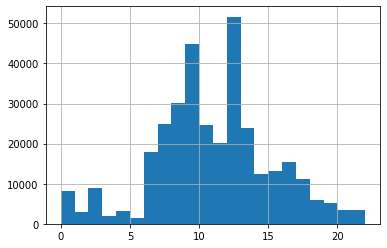

In [27]:
# distribution of tickets by hour

df['Citation Issued DateTime'].dt.hour.hist(bins=range(23))

<AxesSubplot:>

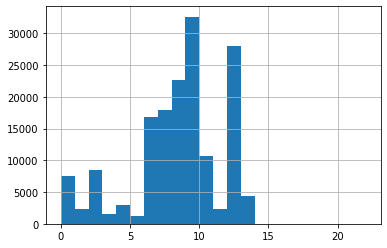

In [29]:
# distribution of street cleaning violations by hour. 

df[df['Violation Description'] == 'STR CLEAN']['Citation Issued DateTime'].dt.hour.hist(bins=range(23))

In [36]:
# filter out low number of citations that don't have street, process, then group by street

def clean_address(string):
    address_words = string.split(' ')
    if address_words[0].isnumeric():
        return ' '.join(address_words[1:])
    return string

df = df[~df['Citation Location'].isnull()]

df['street'] = df['Citation Location'].apply(clean_address)
df['street'].value_counts()

MISSION ST                             9427
CALIFORNIA ST                          3335
POST ST                                3314
SUTTER ST                              3112
EMBARCADERO NORTH                      3102
                                       ... 
MIDCREST WAY                              1
AHERN AND 6TH STREET                      1
SOLA AVENUE                               1
20TH AT FOLSOM                            1
PHELPS ST & WILLIAMS AVE EGBERT AVE       1
Name: street, Length: 6153, dtype: int64

In [38]:
df[df[df['Violation Description'] == 'STR CLEAN']]

STR CLEAN     2919
MTR OUT DT    1554
PRK PROHIB    1155
METER DTN      766
DBL PARK       732
YEL ZONE       679
BUS ZONE       245
NO PLATES      184
TRK ZONE       183
REG TABS       164
PK PHB OTD     158
PK STANDS      128
RED ZONE        76
TRNST ONLY      70
OBSTRCT TF      67
WHITE ZONE      49
OVR 18 " C      40
BLK/INTER       32
TMP PK RES      31
FIRE HYD        23
B ZN NO DP      18
ON SIDEWLK      17
DRIVEWAY        17
PRK GRADE       16
PK/CROSS        12
N/ W/I SPC      12
CNSTR TEMP      12
OT MTR PK        9
MC PRKING        8
PLT LEF/AT       8
ON ST LST        8
BLK BIKE L       5
NO VIOL          5
ON STREET        4
MED DIVIDE       3
PK INTER         3
PLATECOVER       3
WHLCHR ACC       3
PK OVR 72H       2
NOPL/PRDSP       1
OFF ST LST       1
FAILRPLPLA       1
ENG IDLING       1
OT OUT DT        1
ILL PKG          1
OFF STREET       1
Name: Violation Description, dtype: int64

In [54]:
df = gpd.GeoDataFrame(df, geometry='geom')

## Street Cleaning

In [39]:
street_df = pd.read_csv('../data/street_sweeping.csv')

In [40]:
street_df.head()

,CNN,Corridor,Limits,CNNRightLeft,BlockSide,FullName,WeekDay,FromHour,ToHour,Week1,Week2,Week3,Week4,Week5,Holidays,BlockSweepID,Line
0,9102000,Mission St,Julia St - 08th St,L,SouthEast,Thursday,Thu,2,6,1,1,1,1,1,1,1618894,"LINESTRING (-122.412413343787 37.778045328617,..."
1,1191000,22nd St,Mission St - Bartlett St,L,South,Friday,Fri,6,8,1,1,1,1,1,0,1627862,"LINESTRING (-122.418747573844 37.75543693624, ..."
2,4331000,Congdon St,Maynard St - Silver Ave,L,East,Wednesday,Wed,11,13,1,1,1,1,1,0,1637394,"LINESTRING (-122.42602470434 37.72939698234, -..."
3,12043000,Sparta St,Ankeny St - Harkness Ave,R,West,Friday,Fri,12,15,1,1,1,1,1,0,1611118,"LINESTRING (-122.403554923986 37.718336652479,..."
4,13148101,Van Ness Ave,Golden Gate Ave - Turk St,L,West,Tuesday,Tues,2,6,1,1,1,1,1,0,1598891,"LINESTRING (-122.420439517797 37.781030842108,..."


In [45]:
# about 20 streets with no geom information

street_df = street_df[~street_df.Line.isnull()]
street_df.loc[:, 'Line'] = street_df.Line.apply(wkt.loads)

/var/folders/lr/597pxhmx2z78r4vysc_dvsth0000gn/T/ipykernel_34096/171651485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  street_df.loc[:, 'Line'] = street_df.Line.apply(wkt.loads)


In [55]:
street_df = gpd.GeoDataFrame(street_df, geometry='Line')

In [77]:
df_joined = gpd.sjoin_nearest(df[df['Violation Description'] == 'STR CLEAN'], street_df, distance_col='dist')

In [78]:
df_joined.shape

(550619, 36)

In [79]:
df_joined['citation_day'] = df_joined['Citation Issued DateTime'].dt.day

In [80]:
df_joined[['street', 'Corridor', 'Limits', 'dist']]

,street,Corridor,Limits,dist
285,07TH ST,Van Ness Ave,Fell St - Hayes St,0.000059
305,08TH ST,Van Ness Ave,Fell St - Hayes St,0.000059
455,06TH ST,Van Ness Ave,Fell St - Hayes St,0.000059
4038,FELL ST,Van Ness Ave,Fell St - Hayes St,0.000050
4452,08TH AVE,Van Ness Ave,Fell St - Hayes St,0.000059
...,...,...,...,...
336084,BUCHANAN ST,Geneva Ave,I-280 N On Ramp - San Jose Ave,0.000033
336084,BUCHANAN ST,Geneva Ave,I-280 N On Ramp - San Jose Ave,0.000033
336084,BUCHANAN ST,Geneva Ave,I-280 N On Ramp - San Jose Ave,0.000033
336094,GEARY BLVD,Van Ness Ave,North Point St - End: Block,0.000255


In [81]:
df_joined.iloc[0]

Citation Number                                                      926843945
Citation Issued DateTime                                   2020-01-02 00:06:00
Violation                                                            TRC7.2.22
Violation Description                                                STR CLEAN
Citation Location                                                  613 07TH ST
Vehicle Plate State                                                         CA
Vehicle Plate                                                          C042866
Fine Amount                                                               79.0
Date Added                                              04/13/2021 12:00:00 AM
geom                            POINT (-122.41963999999996 37.777120000000025)
Neighborhoods                                                             21.0
SF Find Neighborhoods                                                     21.0
Current Police Districts                            